Workintech Data Analizi Bitirme Projesi

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
products = pd.read_csv(r"C:\Users\rabia\Project_workintech\Workintech_data_analysis_graduation_project\data\products.csv")

In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_ID    1260 non-null   int64 
 1   product_type  1260 non-null   object
 2   product_name  1260 non-null   object
 3   size          1260 non-null   object
 4   colour        1260 non-null   object
 5   price         1260 non-null   int64 
 6   quantity      1260 non-null   int64 
 7   description   1260 non-null   object
dtypes: int64(3), object(5)
memory usage: 78.9+ KB


In [6]:
products.head()

,product_ID,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [18]:
products['product_type'].value_counts()

product_type
Shirt       420
Jacket      420
Trousers    420
Name: count, dtype: int64

In [8]:
products.isna().sum()

product_ID      0
product_type    0
product_name    0
size            0
colour          0
price           0
quantity        0
description     0
dtype: int64

In [10]:
q1 = products['price'].quantile(0.25)  # 1. çeyrek
q3 = products['price'].quantile(0.75)  # 3. çeyrek
iqr = q3 - q1                          # aralık

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_price = products[(products['price'] < lower_bound) | (products['price'] > upper_bound)]
print(len(outliers_price))

0


In [15]:
dup_count = products.duplicated(subset=['product_ID']).sum()
dup_count 

0

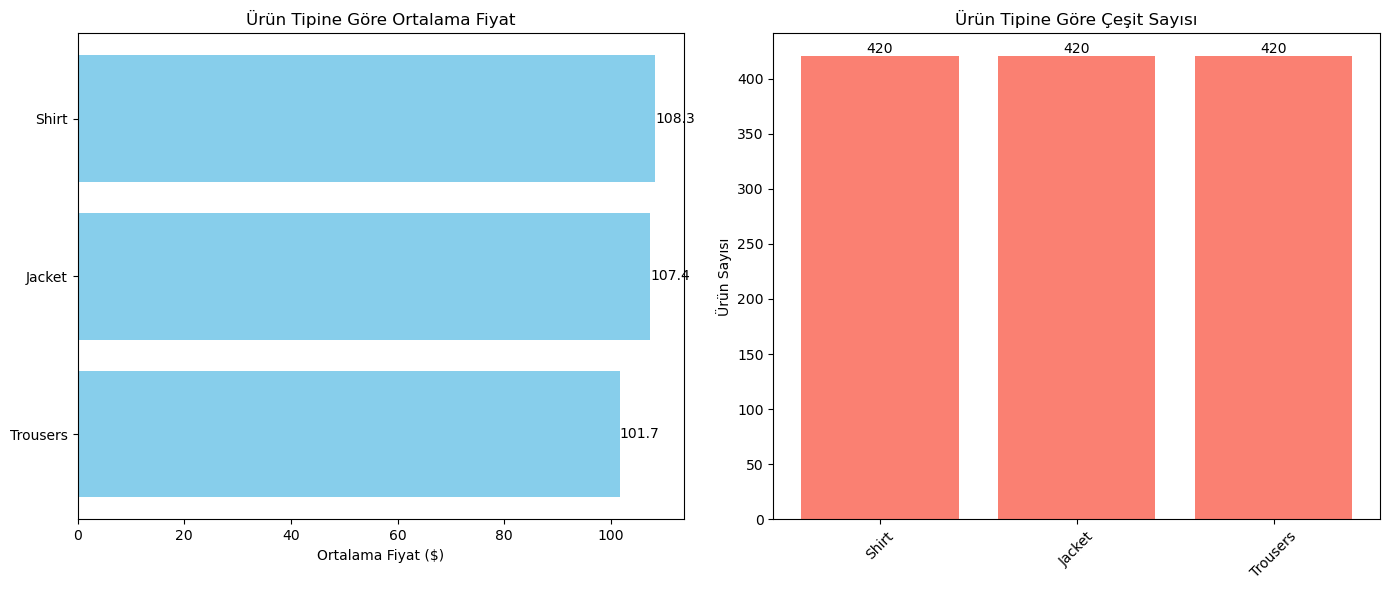

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1) Tipe göre ortalama fiyat
avg_price = products.groupby('product_type')['price'].mean().sort_values()
bars1 = axes[0].barh(avg_price.index, avg_price.values, color='skyblue')
axes[0].set_title('Ürün Tipine Göre Ortalama Fiyat')
axes[0].set_xlabel('Ortalama Fiyat ($)')
axes[0].bar_label(bars1, fmt="%.1f")

# 2) Tipe göre ürün sayısı
count_type = products['product_type'].value_counts()
bars2 = axes[1].bar(count_type.index, count_type.values, color='salmon')
axes[1].set_title('Ürün Tipine Göre Çeşit Sayısı')
axes[1].set_ylabel('Ürün Sayısı')
axes[1].tick_params(axis='x', rotation=45)
axes[1].bar_label(bars2, fmt="%.0f")

plt.tight_layout()
plt.show()
